In [1]:
import maintsim

import random
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

In [2]:
sys = maintsim.System(process_times=[3,5,2],
                      planned_failures=[(1,90,20)],
                      maintenance_capacity=1)
sys.simulate(sim_time=100)

Simulation complete in 0.25s

  Units produced:      17
  System availability: 100.00%



In [8]:
sys.machines[1].total_downtime

12

In [9]:
sys.machine_data[:10]

,time,M0 functional,M0 forced idle,M0 health,M1 functional,M1 forced idle,M1 health,M2 functional,M2 forced idle,M2 health
0,0,1,0,0.0,1,1,0.0,1,1,0.0
1,1,1,0,0.0,1,1,0.0,1,1,0.0
2,2,1,0,0.0,1,1,0.0,1,1,0.0
3,3,1,0,0.0,1,0,0.0,1,1,0.0
4,4,1,0,0.0,1,0,0.0,1,1,0.0
5,5,1,0,0.0,1,0,0.0,1,1,0.0
6,6,1,0,0.0,1,0,0.0,1,1,0.0
7,7,1,0,0.0,1,0,0.0,1,1,0.0
8,8,1,0,0.0,1,0,0.0,1,0,0.0
9,9,1,0,0.0,1,0,0.0,1,0,0.0


In [5]:
sum(sys.machine_data['M1 forced idle'])

12

In [12]:
sys.machine_data.to_csv('/Users/mlh6/Downloads/sim_output.csv')

In [2]:
random.seed(1234)
sys = maintsim.System(process_times=[3, 5, 2],
                      failure_mode='degradation',
                      failure_params=[0.4]*3,
                      initial_health=[0,0,8],
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[8,8,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(5,10)},
                      scheduler=maintsim.Scheduler(),
                      maintenance_capacity=1,
                      allow_new_maintenance=True)
sys.simulate(sim_time=100)

Simulation complete in 0.31s

  Units produced:      6
  System availability: 72.67%



In [27]:
random.seed(1234)
np.random.seed(1234)
sys = maintsim.System(process_times=[3, 5, 2],
                      failure_mode='degradation',
                      failure_params=[0.4]*3,
                      initial_health=[0,0,8],
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[8,8,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(5,10)},
                      scheduler=maintsim.Scheduler(),
                      maintenance_capacity=1,
                      allow_new_maintenance=True)
sys.simulate(sim_time=100)

Simulation complete in 0.27s

  Units produced:      7
  System availability: 73.67%



In [3]:
reps = sys.iterate_simulation(30, objective='availability')

30 replications finished in 7.26s, 0.24s/rep
Average objective: 75.78 % availability


In [4]:
sys.maintenance_data

,time,machine,type,activity,duration
0,1,2,CBM,failure,NA
1,8,2,CBM,repair,6
2,21,2,CBM,failure,13
3,23,0,CBM,failure,NA
4,24,0,CBM,failure,NA
5,26,1,CBM,failure,NA
6,27,1,CBM,failure,NA
7,28,0,CM,failure,NA
8,28,1,CM,failure,NA
9,29,2,CBM,repair,7


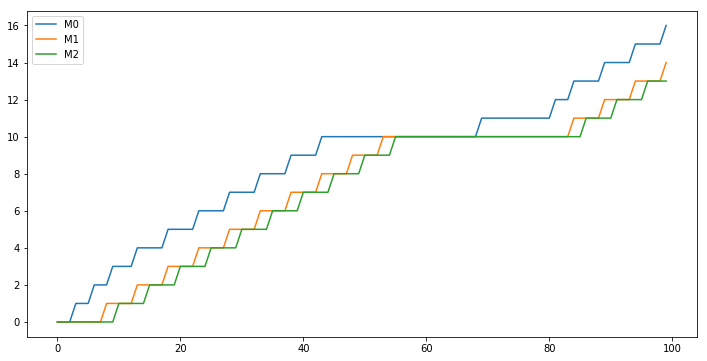

In [4]:
plt.figure(figsize=(12,6))
for i in range(sys.M):
    plt.plot(sys.production_data['M{} production'.format(i)], label='M{}'.format(i))
plt.legend()
plt.show()

In [5]:
sys1 = maintsim.System(process_times=[3, 5, 2],
                       failure_mode='degradation',
                       failure_params=[0.2]*3,
                       #maintenance_policy='CBM',
                       #maintenance_params={'CBM threshold':[8,8,6]},
                       repair_params={'CM':stats.randint(10,20),
                                      'CBM':stats.randint(5,10)},
                       scheduler=maintsim.Scheduler(),
                       maintenance_capacity=1)
sys1.simulate(warmup_time=100, sim_time=200)

Simulation complete in 0.60s

  Units produced:      14
  System availability: 78.00%



In [6]:
#sys1.maintenance_data

In [7]:
for machine in sys1.machines:
    m = machine.m
    print('M{}:'.format(m))
    print('  H_{}(t)={}'.format(m, machine.health))
    print('  R_{}(t)={}'.format(m, machine.remaining_process_time))
    if m < sys1.M-1:
        print('  N_{}(t)={}'.format(m, machine.out_buff.level))
    print()

M0:
  H_0(t)=7
  R_0(t)=2
  N_0(t)=1

M1:
  H_1(t)=0
  R_1(t)=4
  N_1(t)=0

M2:
  H_2(t)=8
  R_2(t)=1



In [8]:
initial_remaining_process = [m.remaining_process_time for m in sys1.machines]
initial_health = [m.health for m in sys1.machines]
initial_buffer = [b.level for b in sys1.buffers]

In [17]:
intial_remaining_process

[1, 5, 2]

In [12]:
initial_health

[3, 2, 1]

In [19]:
initial_buffer

[0, 0]

In [9]:
sys2 = maintsim.System(process_times=[3, 5, 2],
                      initial_remaining_process=initial_remaining_process,
                      initial_buffer=initial_buffer,
                      failure_mode='degradation',
                      failure_params=[0.2]*3,
                      initial_health=initial_health,
                      maintenance_policy='CBM',
                      maintenance_params={'CBM threshold':[8,8,6]},
                      repair_params={'CM':stats.randint(10,20),
                                     'CBM':stats.randint(5,10)},
                      scheduler=maintsim.Scheduler(),
                      maintenance_capacity=1,
                      allow_new_maintenance=False)

In [10]:
sys2.simulate(sim_time=100)

Simulation complete in 0.13s

  Units produced:      7
  System availability: 97.00%



In [11]:
obj = sys2.iterate_simulation(1, sim_time=20, objective='ppl')

1 replications finished in 0.08s, 0.08s/rep
Average objective: 0.40 units lost production


In [13]:
sys2.machines[1].total_downtime

2

In [25]:
sys2.machines[sys2.bottleneck].total_downtime

0

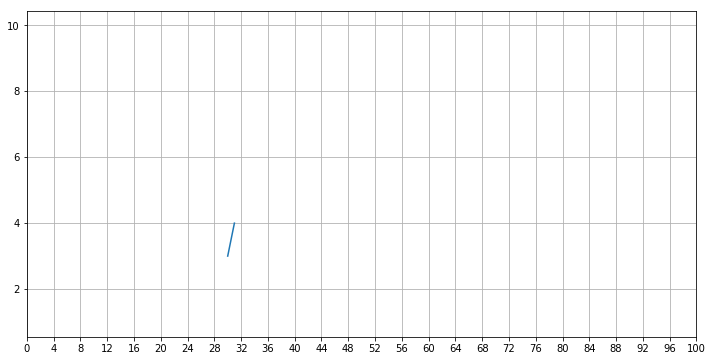

In [5]:
plt.figure(figsize=(12,6))
plt.plot(sys.machine_data['M1 health'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()

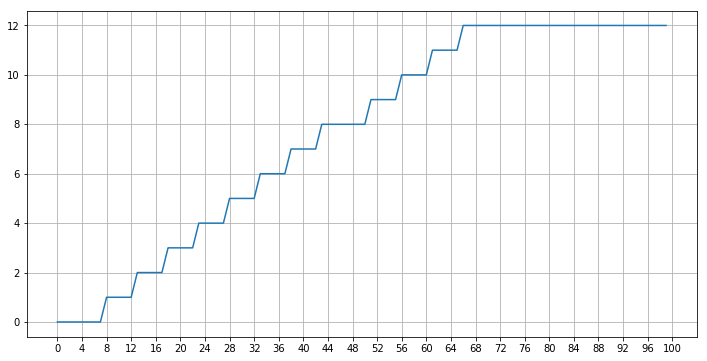

In [7]:
plt.figure(figsize=(12,6))
plt.plot(sys.production_data['M1 production'])
plt.xticks(list(range(0,101,4)))
plt.grid()
plt.show()